# Project: Wrangling and Analyze Data

## Gathering Data
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

**`1.`** Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import json
import credentials
import matplotlib.pyplot as plt
from timeit import default_timer as timer

%matplotlib inline

In [2]:
archive = pd.read_csv('data/twitter-archive-enhanced.csv')
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**`2.`** Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
folder_name = 'data'

# make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# create the request
response = requests.get(url)

# access the content and write it to a file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
image_prediction = pd.read_csv('data/image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**`3.`** Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
consumer_key = credentials.API_KEY
consumer_secret = credentials.API_SECRET_KEY
access_token = credentials.ACCESS_TOKEN
access_secret = credentials.ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, parser=tweepy.parsers.JSONParser())

In [8]:
# use the api to get info on a tweet using a tweet ID from the archive dataframe
# this will help getting acquainted with the structure of the json
tweet = api.get_status(892420643555336193)
tweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [9]:
# searching the dict for key info we need
# notice the json returns tweet_id as merely id
# this will be important when loading the json info into a df
tweet['id']

892420643555336193

In [10]:
# searching the dict for key info we need
tweet['favorite_count']

33865

In [11]:
# searching the dict for key info we need
tweet['retweet_count']

7042

In [12]:
# tweet_ids = archive['tweet_id']
# tweet_errors = {}

# # include count to keep track of how many tweets are left
# count = 1

# with open ('data/tweet_json.txt', 'w') as file:
#     # use a timer to keep track of how long it's taking
#     # it'll likely take around 20-30 minutes
#     start = timer()
    
#     # iterate through the tweet_ids series
#     for tweet_id in tweet_ids:
        
#         # if there are deleted tweets, the code will break
#         # thus a try-except block will come in handy
#         try:
#             # use get_status to access tweet info
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
            
#             # dump the json info onto the new file
#             json.dump(tweet, file)
            
#             # force the creation of a new line
#             file.write("\n")
            
#             # use divmod to get the minutes and seconds elapsed
#             minutes = divmod((timer() - start), 60)
            
#             # since this will take a long time to run,
#             # track progress for sanity reasons
#             print(f'{str(count).zfill(4)}/{tweet_ids.index[-1]} | Time Elapsed: {str(round(minutes[0])).zfill(2)}:{str(round(minutes[1])).zfill(2)}')
            
#             # increase count +1 after every loop
#             count += 1
        
#         except Exception as e:
#             tweet_errors[str(count).zfill(4) + "_" + str(tweet_id)] = tweet
#             print(f'{str(count).zfill(4)}/{tweet_ids.index[-1]} | Error!')
#             count += 1

In [13]:
# create a list to hold the data for each of our tweets
data = []

# open the file
with open('data/tweet_json.txt', 'r') as file:
    # iterate through each line
    for line in file:
        # append each line to the list
        data.append(json.loads(line))

In [14]:
# create the dataframe using the list 
# notice the column names must match the structure of the json
# which means that tweet_id is called 'id'
fav_rt = pd.DataFrame(data, columns=['id', 'favorite_count', 'retweet_count'])
fav_rt.head()

,id,favorite_count,retweet_count
0,892420643555336193,33904,7044
1,892177421306343426,29394,5320
2,891815181378084864,22110,3500
3,891689557279858688,37018,7254
4,891327558926688256,35400,7797


In [15]:
# rename the id column to 'tweet_id'
# to facilitate merging DataFrames later
fav_rt.rename(columns={'id': 'tweet_id'}, inplace=True)
fav_rt.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33904,7044


---

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [16]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
fav_rt

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33904,7044
1,892177421306343426,29394,5320
2,891815181378084864,22110,3500
3,891689557279858688,37018,7254
4,891327558926688256,35400,7797
...,...,...,...
2322,666049248165822465,89,37
2323,666044226329800704,247,116
2324,666033412701032449,100,36
2325,666029285002620928,112,39


##### `archive` table:
- `source` column includes the HTML tag (validity issue)
- There are some invalid entries in the `name` column, like 'a' or 'None' (instead of null) (accuracy issue)
- The columns holding the information on dog stages are inconsistent (apparently 'None' was used instead of NaN). Investigate some more in the programmatic assessment! (validity issue)

##### `fav_rt` table:
- There are less entries in this table (2327) than in the `archive` table (2356) (completeness issue)

### Programmatic Assessment

### Quality

In [18]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# checking for duplicates
sum(archive.duplicated())

0

In [21]:
# checking for duplicates
sum(fav_rt.duplicated())

0

According to tweepy's [documentation](https://docs.tweepy.org/en/latest/api.html#tweepy.API.get_status), the parameter `in_reply_to_status_id` is the ID of an existing status (tweet) that the update is in reply to.  

In [22]:
# there are only 78 entries with this column populated
# what do they look like?
archive[archive['in_reply_to_status_id'].notna()].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None


In [23]:
# while this column should be an int, like tweet_id, it's currently a float
archive['in_reply_to_status_id'].dtype

dtype('float64')

In [24]:
# the same goes for this column
archive['in_reply_to_user_id'].dtype

dtype('float64')

In [25]:
# timestamp should be datetime 
archive['timestamp'].dtype

dtype('O')

In [26]:
# taking a closer look to the structure of the source column
# instead of the HTML tag, use only the text for the source
# in this case, for instance, "Twitter for iPhone"
archive.at[1, 'source']

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [27]:
# taking a closer look to the structure of the text column
# because of the string quotation marks, the url link breaks
# if one tries to click on it
archive.at[1, 'text']

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [28]:
# while this column should be an int, like tweet_id, it's currently a float
archive['retweeted_status_id'].dtype

dtype('float64')

In [29]:
# while this column should be an int, like tweet_id, it's currently a float
archive['retweeted_status_user_id'].dtype

dtype('float64')

In [30]:
# timestamp should be datetime 
archive['retweeted_status_timestamp'].dtype

dtype('O')

In [31]:
# it seems worth checking the outliers
archive.groupby('rating_numerator')['rating_numerator'].count()

rating_numerator
0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [32]:
# checking the highest rating numerator
archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [33]:
# in this case, 1776 is a play with the year the United States' 
# issued its Declaration of Independence 
archive.at[979, 'text'], archive.at[979, 'expanded_urls']

("This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'https://twitter.com/dog_rates/status/749981277374128128/photo/1')

In [34]:
# checking another outlier just to make sure they're ok
archive.query('rating_numerator == 204')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [35]:
# there are 17 dogs in this pic, so 204 is the sum of their ratings
archive.at[1120, 'text'], archive.at[1120, 'expanded_urls']

('Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'https://twitter.com/dog_rates/status/731156023742988288/photo/1')

In [36]:
# it seems worth checking the outliers
archive.groupby('rating_denominator')['rating_numerator'].count()

rating_denominator
0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_numerator, dtype: int64

In [37]:
# checking the outliers
archive.query('rating_denominator == 110')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


In [38]:
# whenever there are more than one dog at the pic,
# the denominator is multiplied by that quantity
# for instance:
archive.at[1635, 'text'], archive.at[1635, 'expanded_urls']

('Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55',
 'https://twitter.com/dog_rates/status/684222868335505415/photo/1')

In [39]:
# investigating the name column
# there seems to be some inaccurate entries like 'a',
# 'such', 'by'
archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [40]:
# using a regular expression to find how many rows contain
# invalid names
archive[archive['name'].str.contains(r'^[a-z]')]['name'].count()

109

In [41]:
# in the visual assessment I could see there were entries 
# listed as 'None' instead of proper 'NaN's
archive.query('name == "None"')['name'].count()

745

In [42]:
# erroneous data type, string instead of bool
archive['doggo'].unique(), archive['pupper'].unique(), archive['puppo'].unique(), archive['floofer'].unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object),
 array(['None', 'floofer'], dtype=object))

In [43]:
[archive.query('doggo == "None"')['doggo'].count(), 
archive.query('pupper == "None"')['pupper'].count(), 
archive.query('puppo == "None"')['puppo'].count(),
archive.query('floofer == "None"')['floofer'].count()]

[2259, 2099, 2326, 2346]

In [44]:
# In the dog breed columns (p1, p2 and p3),
# the dog breeds names are separated by '_'
# instead of space ' ' 
# and not all of them are capitalized
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Recap: Quality Issues
##### `archive` table:
- `in_reply_to_status_id`: erroneous datatype (float, should be int)
- `in_reply_to_user_id`: erroneous datatype (float, should be int)
- `timestamp`: erroneus datatype (object, should be datetime) 
- `source`: instead of the HTML tag, use just the text for the source
- `retweeted_status_id`: erroneous datatype (float, should be int) 
- `retweeted_status_user_id`: erroneous datatype (float, should be int)
- `retweeted_status_timestamp`: erroneus datatype (object, should be datetime)
- `name`: there are 109 rows with invalid, lowercase words instead of names. Drop those rows
- `name`: there are 705 rows in which a dog name wasn't listed but instead of a null value, there is a None string as an entry instead
- `text`: because of the string quotation marks, the url link breaks if one tries to click on it
- `doggo`: erroneous data type, string instead of bool
- `pupper`: erroneous data type, string instead of bool
- `puppo`: erroneous data type, string instead of bool
- `floofer`: erroneous data type, string instead of bool
- Retweets should be dropped


##### `image_prediction` table:
- `p1`, `p2`, `p3`: dog breeds are separated by '_' instead of spaces ' '
- `p1`, `p2`, `p3`: some dog breed are not capitalized
- The neural network apparently identified that some images are not from dogs.

### Tidiness:

There are three requirements for tidy data:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

In [46]:
# there are only 181 entries with this column populated
# what do they look like?
archive[archive['retweeted_status_id'].notna()].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None


#### Recap: tidiness issues
- Four variables in one column in the `archive` table (`dog_stage`, i.e., doggo, floofer, pupper, and puppo)
- The dataset could be tidily represented with the columns `favorite_count` and `retweet_count` in the `archive` table
- The dataset could be tidily represented joining the `image_prediction` table into the `archive` table to create one master dataset

### Compiled list of issues

### Quality:

##### `archive` table:
1. `source` column includes the HTML tag
2. Erroneus datatypes (`timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_user_id`, `retweeted_status_id`, `retweeted_status_timestamp`)
3. `name` column has 109 rows with invalid, lower case words
4. `name` column has 705 rows in which a dog name wasn't listed but instead of a null value, there is a None string as an entry instead
5. In the `text` column, because of the string quotation marks, the url link breaks if one tries to click on it
6. `doggo`, `pupper`, `puppo`, `floofer`: columns have rows in which a dog stage wasn't listed but instead of a null value, there is a None string as an entry instead
7. `doggo`, `pupper`, `puppo`, `floofer`: erroneous data type, string instead of bool
8. Retweets should be dropped

##### `image_prediction` table:

9. `p1`, `p2`, `p3`: dog breeds are separated by '_' instead of spaces ' '
10. `p1`, `p2`, `p3`: some dog breed are not capitalized
11. The neural network apparently identified that some images are not from dogs

### Tidiness:
1. The dataset could be tidily represented with the columns `favorite_count` and `retweet_count` in the `archive` table
2. Four variables in one column in the `archive` table (`dog_stage`, i.e., doggo, floofer, pupper, and puppo)
3. The dataset could be tidily represented joining the `image_prediction` table into the `archive` table to create one master dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [47]:
archive_copy = archive.copy()
fav_rt_copy = fav_rt.copy()
image_prediction_copy = image_prediction.copy()

### Address Tidiness:

1. The dataset could be tidily represented with the columns `favorite_count` and `retweet_count` in the `archive` table
2. Four variables in one column in the `archive` table (`dog_stage`, i.e., doggo, floofer, pupper, and puppo)
3. The dataset could be tidily represented joining the `image_prediction` table into the `archive` table to create one master dataset

### Tidiness Issue #1:

#### Define: 

Use [`df.merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) to merge the tables `archive` and `fav_rt`. 

#### Code

In [48]:
# right joining the tables will ensure that the info on
# those 29 tweets that were unreachable via the API 
# will be dropped from the archive_copy df
archive_copy = archive_copy.merge(fav_rt_copy, how='right')

#### Test

In [49]:
# checking to see if it worked
archive_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
329,831939777352105988,NaN,NaN,2017-02-15 18:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831939777...,12,10,Emanuel,doggo,None,None,None,22555,5693


In [50]:
# checking to see if it worked
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2327 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2327 non-null   object 
 4   source                      2327 non-null   object 
 5   text                        2327 non-null   object 
 6   retweeted_status_id         160 non-null    float64
 7   retweeted_status_user_id    160 non-null    float64
 8   retweeted_status_timestamp  160 non-null    object 
 9   expanded_urls               2269 non-null   object 
 10  rating_numerator            2327 non-null   int64  
 11  rating_denominator          2327 non-null   int64  
 12  name                        2327 non-null   object 
 13  doggo                       2327 

### Tidiness Issue #2:

#### Define: 

Create a function to extract the dog stage from each of the four dog stage columns (i.e., `doggo`, `puppo`, `pupper`, and `floofer`). Then, use [`df.apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to apply the function and create the `dog_stage` column. 

#### Code

Note: I couldn't make `pd.melt` work, since there are many rows without any classification for dog stage at all. Dropping them would mean losing a huge chunk of the dataset that is perfectly valid for other analises. Instead, I found help at [this discussion](https://knowledge.udacity.com/questions/80210) from the Udacity forum. 

In [51]:
# id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
#        'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
#        'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
#        'rating_denominator', 'name', 'favorite_count', 'retweet_count']
# value_vars = ['doggo', 'floofer', 'pupper', 'puppo']
# var_name = 'to_drop'
# value_name = 'dog_stage'
# archive_copy = pd.melt(archive_copy, id_vars=id_vars, value_vars=value_vars, var_name=var_name, value_name=value_name)

In [52]:
# create function to extract the dog stage from the four columns
def select_dog_stage(df):
    if df['doggo'] == 'doggo':
        return 'doggo'
    elif df['floofer'] == 'floofer':
        return 'floofer'
    elif df['pupper'] == 'pupper':
        return 'pupper'
    elif df['puppo'] == 'puppo':
        return 'puppo'
    else:
        return pd.NA

In [53]:
# apply function
archive_copy['dog_stage'] = archive_copy.apply(lambda x: select_dog_stage(x), axis=1)

# drop columns since they won't be useful anymore
archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [54]:
# check if the column has the expected values
# for the dog stage
archive_copy['dog_stage'].unique()

array([<NA>, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [55]:
# check to see if it worked
archive_copy['dog_stage'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2327 entries, 0 to 2326
Series name: dog_stage
Non-Null Count  Dtype 
--------------  ----- 
375 non-null    object
dtypes: object(1)
memory usage: 36.4+ KB


In [56]:
# check to see if it worked
archive_copy[archive_copy['dog_stage'].notna()].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,28021,6128,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,42146,8383,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,13385,1886,puppo


### Address Quality:

##### `archive` table:
1. `source` column includes the HTML tag
2. Erroneus datatypes (`timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_user_id`, `retweeted_status_id`, `retweeted_status_timestamp`)
3. `name` column has 109 rows with invalid, lower case words
4. `name` column has 705 rows in which a dog name wasn't listed but instead of a null value, there is a None string as an entry instead
5. In the `text` column, because of the string quotation marks, the url link breaks if one tries to click on it
6. `doggo`, `pupper`, `puppo`, `floofer`: columns have rows in which a dog stage wasn't listed but instead of a null value, there is a None string as an entry instead
7. `doggo`, `pupper`, `puppo`, `floofer`: erroneous data type, string instead of bool
8. Retweets should be dropped

##### `image_prediction` table:

9. `p1`, `p2`, `p3`: dog breeds are separated by '_' instead of spaces ' '
10. `p1`, `p2`, `p3`: some dog breed are not capitalized

### Quality Issue #1:

#### Define: 

Use a regular expression to leave just the text for the HTML tag in the `source` column

#### Code:

In [57]:
# check an entry just to see the structure of the column 
# to build to regex
archive_copy.at[1, 'source']

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [58]:
# use str.extract to get just the text for the tag
archive_copy['source'] = archive_copy['source'].str.extract(r'>([A-Z].*[a-z])<')

#### Test:

In [59]:
# check to see if it worked
archive_copy['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Quality Issue #2:

#### Define: 

Deal with various columns in erroneous datatypes:

- `timestamp`: use [`pd.datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert the column from `object` to `datetime`.
- `retweeted_status_timestamp`: use [`pd.datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert the column from `object` to `datetime`.
- `in_reply_to_status_id`: use [`pd.astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) to convert column from `float64` to `Int64`.
- `in_reply_to_user_id`: use [`pd.astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) to convert column from `float64` to `Int64`.
- `retweeted_status_user_id`: use [`pd.astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) to convert column from `float64` to `Int64`.
- `retweeted_status_id`: use [`pd.astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) to convert column from `float64` to `Int64`.

#### Code:

In [60]:
# currently, they're both objects (strings)
archive_copy['timestamp'].dtype, archive_copy['retweeted_status_timestamp'].dtype

(dtype('O'), dtype('O'))

In [61]:
# convert them to datetime
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])
archive_copy['retweeted_status_timestamp'] = pd.to_datetime(archive_copy['retweeted_status_timestamp'])

In [62]:
# currently, they're all floats
[archive_copy['in_reply_to_status_id'].dtype, 
archive_copy['in_reply_to_user_id'].dtype, 
archive_copy['retweeted_status_user_id'].dtype, 
archive_copy['retweeted_status_id'].dtype]

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]

> [Note 1](https://stackoverflow.com/questions/39690742/convert-float-to-int-and-leave-nulls): Stack Overflow discussion on converting float to intergers leaving null values.

> [Note 2](https://pandas.pydata.org/docs/user_guide/integer_na.html): on converting from float to interger if your series contains null values.

In [63]:
# convert from float to ints
# use dtype = Int64
# all NA-like values will be replaced with pandas.NA
# otherwise, casting won't work
archive_copy = archive_copy.astype({'in_reply_to_status_id': 'Int64', 
                    'in_reply_to_user_id': 'Int64',
                    'retweeted_status_user_id': 'Int64',
                    'retweeted_status_id': 'Int64'})

#### Test:

In [64]:
# check to see if it worked 
archive_copy['timestamp'].dtype, archive_copy['retweeted_status_timestamp'].dtype

(datetime64[ns, UTC], datetime64[ns, UTC])

In [65]:
# check to see if it worked
[archive_copy['in_reply_to_status_id'].dtype, 
archive_copy['in_reply_to_user_id'].dtype, 
archive_copy['retweeted_status_user_id'].dtype, 
archive_copy['retweeted_status_id'].dtype]

[Int64Dtype(), Int64Dtype(), Int64Dtype(), Int64Dtype()]

In [66]:
archive_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,33904,7044,<NA>


In [67]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2327 non-null   int64              
 1   in_reply_to_status_id       78 non-null     Int64              
 2   in_reply_to_user_id         78 non-null     Int64              
 3   timestamp                   2327 non-null   datetime64[ns, UTC]
 4   source                      2327 non-null   object             
 5   text                        2327 non-null   object             
 6   retweeted_status_id         160 non-null    Int64              
 7   retweeted_status_user_id    160 non-null    Int64              
 8   retweeted_status_timestamp  160 non-null    datetime64[ns, UTC]
 9   expanded_urls               2269 non-null   object             
 10  rating_numerator            2327 non-null   int64           

### Quality Issue #3:

#### Define:

Find the rows in which invalid, lowercase words were used in the `name` column. Change those to pd.NA. 

#### Code:

In [68]:
# current situation of the column
archive_copy['name'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2327 entries, 0 to 2326
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
2327 non-null   object
dtypes: object(1)
memory usage: 100.9+ KB


In [69]:
# get those indices
indices = archive_copy[archive_copy['name'].str.contains(r'^[a-z]')]['name'].index

# change them to pd.NA
archive_copy.loc[indices, 'name'] = pd.NA

#### Test:

In [70]:
# check to see if it worked 
archive_copy['name'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2327 entries, 0 to 2326
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
2219 non-null   object
dtypes: object(1)
memory usage: 100.9+ KB


### Quality Issue #4: 

#### Define: 

Find the rows in which a dog name wasn't listed but instead of a null value, there is a `None` string as an entry instead. Change those to pd.NA.

#### Code:

In [71]:
indices = archive_copy.query('name == "None"').index

# change them to pd.NA
archive_copy.loc[indices, 'name'] = pd.NA

#### Test:

In [72]:
# check to see if it worked 
archive_copy['name'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2327 entries, 0 to 2326
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
1487 non-null   object
dtypes: object(1)
memory usage: 100.9+ KB


### Quality Issue #5:

#### Define: 

For every entry in the `text` column, add a trailing space. This way, if you click on the link, it won't assume the quotation mark belongs to the url and it'll open just fine. 

#### Code:

In [73]:
# check the structure of the column
archive_copy.at[1, 'text']

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [74]:
archive_copy['text'] = archive_copy['text'] + " "

#### Test:

In [75]:
# check to see if it worked 
archive_copy.at[1, 'text']

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV "

### Quality Issues #6 and #7

6. `doggo`, `pupper`, `puppo`, `floofer`: columns have rows in which a dog stage wasn't listed but instead of a null value, there is a None string as an entry instead
7. `doggo`, `pupper`, `puppo`, `floofer`: erroneous data type, string instead of bool

In the Tidiness Issue #2, these columns were repurposed as a single `dog_stage` column and the null values were already converted to `pd.NA`. Therefore, both of these issues were already addressed.

### Quality Issue #8:

#### Define: 

First, use [`pd.index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html) to get the indices for the rows representing retweets. Then, drop those rows. Finally, since those columns won't be useful anymore, drop them.

#### Code:

In [76]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2327 non-null   int64              
 1   in_reply_to_status_id       78 non-null     Int64              
 2   in_reply_to_user_id         78 non-null     Int64              
 3   timestamp                   2327 non-null   datetime64[ns, UTC]
 4   source                      2327 non-null   object             
 5   text                        2327 non-null   object             
 6   retweeted_status_id         160 non-null    Int64              
 7   retweeted_status_user_id    160 non-null    Int64              
 8   retweeted_status_timestamp  160 non-null    datetime64[ns, UTC]
 9   expanded_urls               2269 non-null   object             
 10  rating_numerator            2327 non-null   int64           

In [77]:
# get the indices from the retweets
indices = archive_copy[archive_copy['retweeted_status_id'].notna()].index

# drop them
archive_copy = archive_copy.drop(indices)

#### Test:

In [78]:
# check to see if it worked
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2326
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2167 non-null   int64              
 1   in_reply_to_status_id       78 non-null     Int64              
 2   in_reply_to_user_id         78 non-null     Int64              
 3   timestamp                   2167 non-null   datetime64[ns, UTC]
 4   source                      2167 non-null   object             
 5   text                        2167 non-null   object             
 6   retweeted_status_id         0 non-null      Int64              
 7   retweeted_status_user_id    0 non-null      Int64              
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2109 non-null   object             
 10  rating_numerator            2167 non-null   int64           

#### Code:

In [79]:
# drop the columns related to the retweets, since they 
# won't be used anymore
archive_copy = archive_copy.drop(['retweeted_status_id', 
                                  'retweeted_status_user_id',
                                  'retweeted_status_timestamp'], axis=1)

#### Test:

In [80]:
# check to see if it worked
archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'dog_stage'],
      dtype='object')

### Quality Issues #9 and #10:

#### Define:
Use [`str.replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html) and [`str.title`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html#pandas.Series.str.title) to replace the underscores ('_') with spaces (' ') and convert the first character of each word to uppercase, respectively. 

#### Code:

In [81]:
image_prediction_copy.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [82]:
# use str.replace to replace and str.title
image_prediction_copy['p1'] = image_prediction_copy['p1'].str.replace('_', ' ').str.title()
image_prediction_copy['p2'] = image_prediction_copy['p2'].str.replace('_', ' ').str.title()
image_prediction_copy['p3'] = image_prediction_copy['p3'].str.replace('_', ' ').str.title()

#### Test:

In [83]:
# check to see if it worked
image_prediction_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality Issue #11:

#### Define:
First, use [`pd.index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html) to get the indices for the rows in which none of the predictions (`p1`, `p2`, `p3`) seem to come from dogs. Then, drop those rows.


#### Code:

In [84]:
# check the original composition of the table
# before dropping any rows
image_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [85]:
# there might be cases in which the first identified object 
# in the image is not a dog, but that doesn't mean a dog
# won't show up in the second or third option
image_prediction_copy.query('p1_dog == False').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,Desktop Computer,0.086502,False,Desk,0.085547,False,Bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,Three-Toed Sloth,0.914671,False,Otter,0.015250,False,Great Grey Owl,0.013207,False


In [86]:
# drop only the rows in which p1_dog,
# p2_dog and p3_dog are false

# get the indices
indices = image_prediction_copy.query('p1_dog == False and p2_dog == False and p3_dog == False').index

# drop the rows
image_prediction_copy = image_prediction_copy.drop(indices)

#### Test:

In [87]:
# check to see if it worked
image_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


Now that every quality issue was addressed, all that's left is Tidiness Issue #3, i.e., joining the `image_prediction` table and the `archive` table to create one big, clean, dataset. 

### Tidiness Issue #3:

3. The dataset could be tidily represented joining the `image_prediction` table into the `archive` table to create one master dataset

#### Define:

#### Code:

In [88]:
# inner merge will ensure that only tweets that went through
# the image prediction neural network are kept
# and also the tweets of the archive table
# in other words, the intersection of keys from both dataframes
master = archive_copy.merge(image_prediction_copy, how='inner')

In [89]:
# make a copy of the master dataset
master_clean = master.copy()

#### Test:

In [90]:
# check to see if it worked
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1678 non-null   int64              
 1   in_reply_to_status_id  20 non-null     Int64              
 2   in_reply_to_user_id    20 non-null     Int64              
 3   timestamp              1678 non-null   datetime64[ns, UTC]
 4   source                 1678 non-null   object             
 5   text                   1678 non-null   object             
 6   expanded_urls          1678 non-null   object             
 7   rating_numerator       1678 non-null   int64              
 8   rating_denominator     1678 non-null   int64              
 9   name                   1180 non-null   object             
 10  favorite_count         1678 non-null   int64              
 11  retweet_count          1678 non-null   int64            

In [91]:
master_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


Before moving on to store the dataset, all that's left is dropping the columns that won't be used in analysis.

#### Code:

In [92]:
master_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'expanded_urls', 'jpg_url', 'img_num'], axis=1, inplace=True)

#### Test:

In [93]:
master_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,29394,5320,<NA>,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,22110,3500,<NA>,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


In [94]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1678 non-null   int64              
 1   timestamp           1678 non-null   datetime64[ns, UTC]
 2   text                1678 non-null   object             
 3   rating_numerator    1678 non-null   int64              
 4   rating_denominator  1678 non-null   int64              
 5   name                1180 non-null   object             
 6   favorite_count      1678 non-null   int64              
 7   retweet_count       1678 non-null   int64              
 8   dog_stage           259 non-null    object             
 9   p1                  1678 non-null   object             
 10  p1_conf             1678 non-null   float64            
 11  p1_dog              1678 non-null   bool               
 12  p2                  1678 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [95]:
master_clean.to_csv('data/twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight #1: What are the 5 most common dog breeds in terms of sum of favorite tweets?

In [96]:
# check the structure of the master dataset
master_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,29394,5320,<NA>,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


In [97]:
# group by the dog breed and sum the number of times 
# a given tweet with that breed was favorited 
top_breeds = master_clean.groupby('p1')['favorite_count'].sum().sort_values(ascending=False)
top_breeds

p1
Golden Retriever      1479733
Labrador Retriever     913066
Pembroke               869849
Chihuahua              600126
Samoyed                449086
                       ...   
Ox                        498
Seashore                  441
Window Shade              297
Piggy Bank                289
Hay                       214
Name: favorite_count, Length: 214, dtype: int64

#### Visualization #1:

In [98]:
# creating a function to generate bar charts and avoid repeating code unnecessarily
def chart(input):
    fig, ax = plt.subplots()
    ax = input.plot(kind='bar')
    ax.yaxis.set_major_formatter('{x:,.0f}')

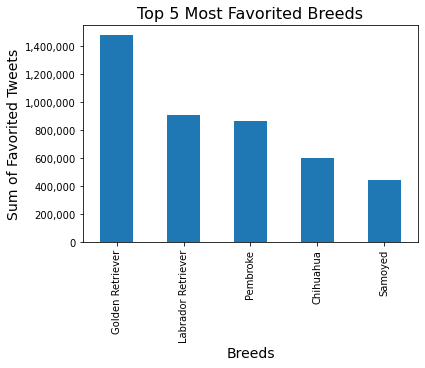

In [99]:
# plotting bar chart for insight #1
chart(top_breeds.iloc[:5])
plt.title('Top 5 Most Favorited Breeds', fontsize=16)
plt.xlabel('Breeds', fontsize=14);
plt.ylabel('Sum of Favorited Tweets', fontsize=14);

### Insight #2: Does the dog stage influence the amount of interations a tweet receive (favorites and retweets)?

In [100]:
# create a column called 'interactions'
# representing the amount of times a tweet was 
# both favorited and retweeted
master_clean['interactions'] = master_clean['favorite_count'] + master_clean['retweet_count']

In [101]:
# check to see if it worked
master_clean.sample()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,interactions
1623,667174963120574464,2015-11-19 02:58:01+00:00,This is Clarence. His face says he doesn't wan...,9,10,Clarence,218,70,<NA>,Toy Poodle,0.266437,True,Chihuahua,0.243223,True,Bluetick,0.072806,True,288


In [102]:
# capitalize the dog stage for style
master_clean['dog_stage'] = master_clean['dog_stage'].str.title()

In [103]:
# group by the dog stage and get the sum of interactions
rating_influence = master_clean.groupby(['dog_stage'])['interactions'].sum().sort_values(ascending=False)
rating_influence

dog_stage
Doggo      1471192
Pupper     1423833
Puppo       522098
Floofer     106798
Name: interactions, dtype: int64

#### Visualization #2:

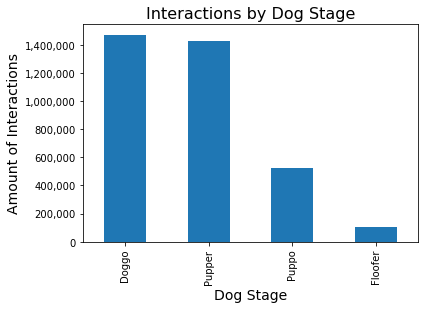

In [104]:
# plotting bar chart for insight #2
chart(rating_influence)
plt.title('Interactions by Dog Stage', fontsize=16)
plt.xlabel('Dog Stage', fontsize=14);
plt.ylabel('Amount of Interactions', fontsize=14);

### Insight #3: Does the average rating increase through time?

Note: I used [this](https://towardsdatascience.com/how-to-group-data-by-different-time-intervals-using-python-pandas-eb7134f9b9b0) Medium post to figure out how to group by month. Then, I went to the [`pd.resample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) documentation and found out how to group by trimesters. 

In [105]:
# first, query just the rows in which the rating denominator is 10
# i.e., the tweets with only one dog in the picture,
# to remove the outliers
# then, resample by the trimester
# finally, get the mean rating numerator for each trimester
trimesters = master_clean.query('rating_denominator == 10').resample('3M', on='timestamp')['rating_numerator'].mean()
trimesters

timestamp
2015-11-30 00:00:00+00:00     9.448889
2016-02-29 00:00:00+00:00    10.252896
2016-05-31 00:00:00+00:00    10.695000
2016-08-31 00:00:00+00:00    10.710526
2016-11-30 00:00:00+00:00    12.062112
2017-02-28 00:00:00+00:00    12.148810
2017-05-31 00:00:00+00:00    12.428571
2017-08-31 00:00:00+00:00    12.586207
Freq: 3M, Name: rating_numerator, dtype: float64

#### Visualization #3:

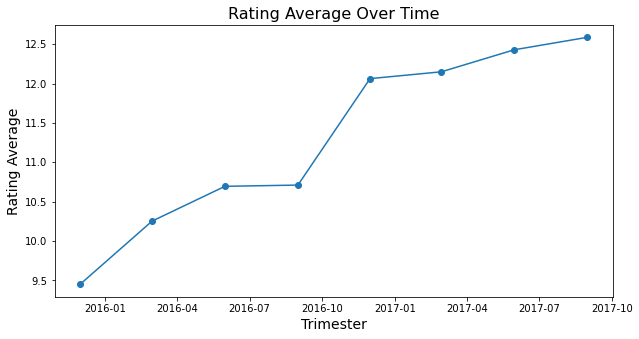

In [106]:
# plotting line chart
fig, ax = plt.subplots()
ax.plot(trimesters, 'o-')
fig.set_figheight(5)
fig.set_figwidth(10)
plt.title('Rating Average Over Time', fontsize=16)
plt.xlabel('Trimester', fontsize=14);
plt.ylabel('Rating Average', fontsize=14);

### Insights:
**`1.`** The top 5 most favorited breeds are: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua and Samoyed. This insight was only possible after piercing together and cleaning the master dataset. The main pieces of information needed for this insight were: number of times a tweet was favorited and dog breed. Both of those columns were originally in separate datasets.

**`2.`** According to WeRateDog's [dogtionary](https://video.udacity-data.com/topher/2017/October/59e04ceb_dogtionary-combined/dogtionary-combined.png), the four dog stages are: doggo, pupper, puppo and floofer. One might think that puppers (small dogs, usually younger) get the most interactions, but the amount of interactions puppers received are almost the same as doggos (a big pupper, usually older). In a distant third, comes the puppos (a transitional phase between puppo and doggos). Lastly, the floofers (any dogs with seemingly excess fur). As a limitation, it's worth mentioning that only a small number of the sample had the dog stage. This insight was only possible after tidying the four dog stage columns and turning them into one.

**`3.`** Although we only have tweet info from 2016 and 2017, the data seem to suggest the average rating for dogs is increasing through time. Without converting the timestamp column to datetime, this analysis wouldn't be possible.

### Visualizations

#### Insight #1:

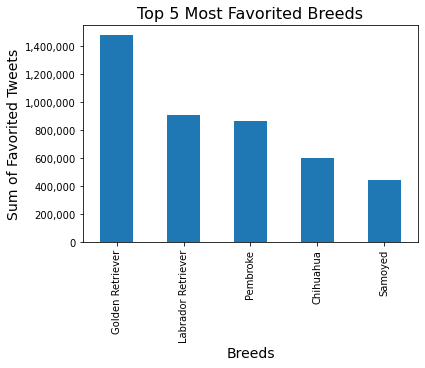

In [107]:
# plotting bar chart for insight #1
chart(top_breeds.iloc[:5])
plt.title('Top 5 Most Favorited Breeds', fontsize=16)
plt.xlabel('Breeds', fontsize=14);
plt.ylabel('Sum of Favorited Tweets', fontsize=14);

#### Insight #2:

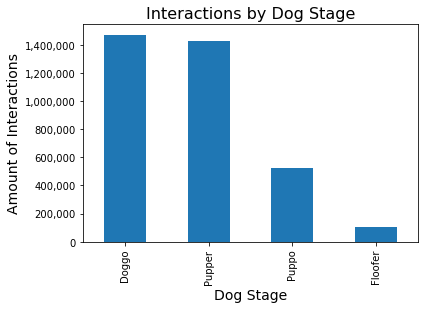

In [108]:
# plotting bar chart for insight #2
chart(rating_influence)
plt.title('Interactions by Dog Stage', fontsize=16)
plt.xlabel('Dog Stage', fontsize=14);
plt.ylabel('Amount of Interactions', fontsize=14);

#### Insight #3:

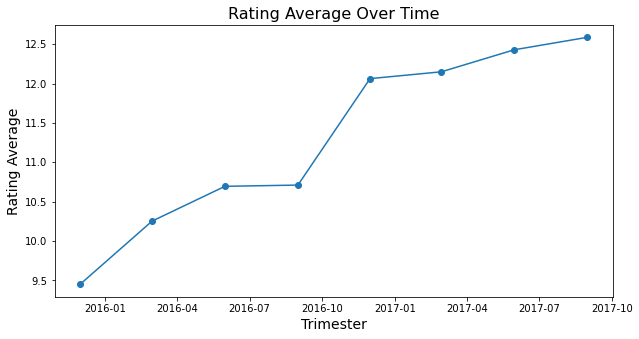

In [109]:
# plotting line chart
fig, ax = plt.subplots()
ax.plot(trimesters, 'o-')
fig.set_figheight(5)
fig.set_figwidth(10)
plt.title('Rating Average Over Time', fontsize=16)
plt.xlabel('Trimester', fontsize=14);
plt.ylabel('Rating Average', fontsize=14);